# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [11]:
from PIL import Image
from waymo_open_dataset import dataset_pb2 as open_dataset
from utils import get_dataset, parse_frame, int64_feature, int64_list_feature, bytes_feature , bytes_list_feature, float_list_feature

import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
import seaborn as sns

import os 

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

%matplotlib inline

In [12]:
dataset = get_dataset("data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


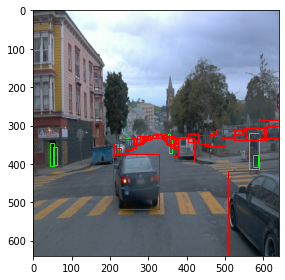

idx:  0


In [14]:
dataset = get_dataset("data/train/*.tfrecord")

for idx, data in enumerate(dataset):
    display_images(data)
    print("idx: ", idx)
    #print("data.keys(): ", data.keys())
    
    bboxes = data['groundtruth_boxes']
    classes = data['groundtruth_classes']
    
    #print("len(bboxes): ", len(bboxes))
    #print("classes: ", classes)
    
    if idx == 0:
        break

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [13]:
fig = plt.figure(figsize=(12, 8))

def display_images(batch):
    width = batch['image'].shape[0]
    height = batch['image'].shape[0]
    
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    
    img = batch['image']
    
    plt.imshow(img)
    
    bboxes = batch['groundtruth_boxes']
    classes = batch['groundtruth_classes']
    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb.numpy() * 640
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', 
                         edgecolor=colormap[cl.numpy()])
        plt.gca().add_patch(rec)
        
    plt.tight_layout()
    plt.show()
    
    pass

<Figure size 864x576 with 0 Axes>

In [ ]:
for idx, data in enumerate(dataset):
    display_images(data)
    if idx == 0:
        break

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [ ]:
# color mapping of classes
colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

f, ax = plt.subplots(2, 5, figsize=(20, 10))

# Display 10 random images in dataset
data = dataset.batch(10)
for i, data in enumerate(dataset):
    x = i % 2
    y = i % 5

    width = data['image'].shape[0]
    height = data['image'].shape[0]
    
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    
    img = data['image']
    ax[x, y].imshow(img)

    bboxes = data['groundtruth_boxes']
    classes = data['groundtruth_classes']
    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb.numpy() * 640
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', 
                         edgecolor=colormap[cl.numpy()])
        ax[x, y].add_patch(rec)
        
    ax[x, y].axis('off')

    # display_images(data)
    if i == 9:
        break
        
plt.tight_layout()
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [ ]:
data = dataset.batch(10)

red = []
green = []
blue = []

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

use = ['r','g','b']
for i, data in enumerate(dataset):
    width = data['image'].shape[0]
    height = data['image'].shape[0]

    img = data['image'].numpy()
    R, G, B = img[..., 0], img[..., 1], img[..., 2]
    red.extend(R.flatten().tolist())
    green.extend(G.flatten().tolist())
    blue.extend(B.flatten().tolist())
    
    if i == 9:
        ax_r = sns.kdeplot(red, color='r', ax=ax, label='Red')
        ax_r.legend(loc="upper right")
        
        ax_g = sns.kdeplot(green, color='g', ax=ax, label='Green')
        ax_g.legend(loc="upper right")
        
        ax_b = sns.kdeplot(blue, color='b',ax=ax, label='Blue')
        ax_b.legend(loc="upper right")
        
        plt.title('RGB channel histogram')
        plt.xlabel('Intensity[0 ~ 255]')
        
        break

INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Re

INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10723911392655396041_860_000_880_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading 

INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-1083056852838271990_4080_000_4100_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-1083056852838271990_4080_000_4100_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number

INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Read

INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:

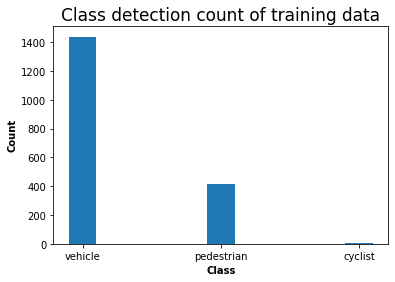

In [41]:
from PIL import Image
from waymo_open_dataset import dataset_pb2 as open_dataset
from utils import get_dataset, parse_frame, int64_feature, int64_list_feature, bytes_feature , bytes_list_feature, float_list_feature
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
import seaborn as sns
import os 
import io
import pandas as pd

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

%matplotlib inline

train_data_list = glob.glob("data/train/*.tfrecord")

sum_vehicle_count = 0
sum_pedestrian_count = 0
sum_cyclist_count = 0
for idx, train_data in enumerate(train_data_list):
    dataset = get_dataset(train_data)
    
    for data in dataset:
        filename = data['filename'].numpy()
        bboxes = data['groundtruth_boxes'].numpy()
        classes = data['groundtruth_classes'].numpy()
        
        vehicle_count = np.count_nonzero(classes == 1)
        pedestrian_count = np.count_nonzero(classes == 2)
        cyclist_count = np.count_nonzero(classes == 4)
        
        sum_vehicle_count += vehicle_count
        sum_pedestrian_count += pedestrian_count
        sum_cyclist_count += cyclist_count

        break
        
object_count = {'vehicle': sum_vehicle_count, 'pedestrian': sum_pedestrian_count, 'cyclist': sum_cyclist_count}
X = np.arange(len(object_count))
ax = plt.subplot(111)
ax.bar(X, object_count.values(), width=0.2, align='center')
plt.xticks(X, object_count.keys())
plt.xlabel('Class', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title("Class detection count of training data", fontsize=17)
plt.show()

INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/val/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/val/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-11925224148023145510_1040_000_1060_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/val/segment-11925224148023145510_1040_000_1060_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unwe

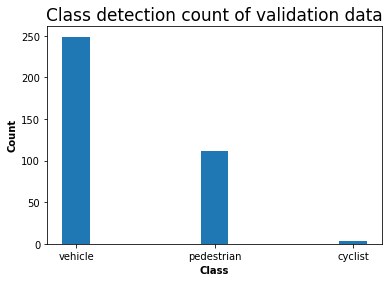

In [42]:
val_data_list = glob.glob("data/val/*.tfrecord")

sum_vehicle_count = 0
sum_pedestrian_count = 0
sum_cyclist_count = 0
for idx, val_data in enumerate(val_data_list):
    dataset = get_dataset(val_data)
    
    for data in dataset:
        filename = data['filename'].numpy()
        bboxes = data['groundtruth_boxes'].numpy()
        classes = data['groundtruth_classes'].numpy()
        
        vehicle_count = np.count_nonzero(classes == 1)
        pedestrian_count = np.count_nonzero(classes == 2)
        cyclist_count = np.count_nonzero(classes == 4)
        
        sum_vehicle_count += vehicle_count
        sum_pedestrian_count += pedestrian_count
        sum_cyclist_count += cyclist_count

        break
        
object_count = {'vehicle': sum_vehicle_count, 'pedestrian': sum_pedestrian_count, 'cyclist': sum_cyclist_count}
X = np.arange(len(object_count))
ax = plt.subplot(111)
ax.bar(X, object_count.values(), width=0.2, align='center')
plt.xticks(X, object_count.keys())
plt.xlabel('Class', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title("Class detection count of validation data", fontsize=17)
plt.show()